# Coherence and autocorrelation function #
This is a demonstration file for the course PH455/957. 

In [104]:
import numpy as np                     # numpy arrays
import matplotlib.pyplot as plt        # plotting
import PH455
import random 

## Plot coherence function for plane wave. ##

Define the time vector for a monochromatic wave.

In [107]:
t  = np.linspace(0,2,500)    # time 0s to 2s
omega = 2*np.pi/1            # frequency omega  

Define complex wave function 

In [109]:
U = 1*np.exp(1j*omega*t)  

Calculate autocorrelation function and normalize it to get the coherence function.

In [111]:
acorr = PH455.calcAutoCorrelation(U)
g = acorr/acorr[0]

Plot the coherence function g

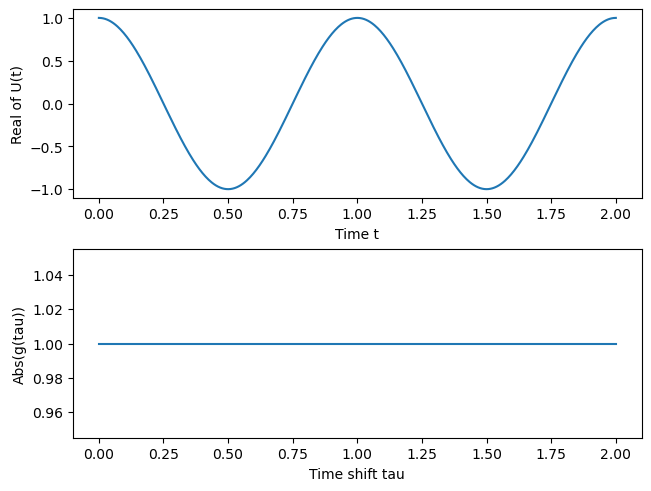

In [113]:
# make sure that the array respresents float numbers
absG = np.float32( np.absolute(g) )

# plot on two axes
fig, axs = plt.subplots(2, 1, layout="constrained")
axs[0].plot(t,np.real(U))
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('Real of U(t)')
axs[1].plot(t, absG )
axs[1].set_xlabel('Time shift tau')
axs[1].set_ylabel('Abs(g(tau))');

## Plot coherence function for random wave. ##

Define complex wave function with random values. Generate numbers between -1 and 1 for real and imag components.

In [116]:
U = np.zeros(len(t),complex)  # empty array
for n in range(len(U)):
    U[n] = (random.random()*2)-1 + 1j*(random.random()*2-1 )

Calculate autocorrelation function and normalize it to get the coherence function.

In [118]:
acorr = PH455.calcAutoCorrelation(U)
g = acorr/acorr[0]

Plot the coherence function g.

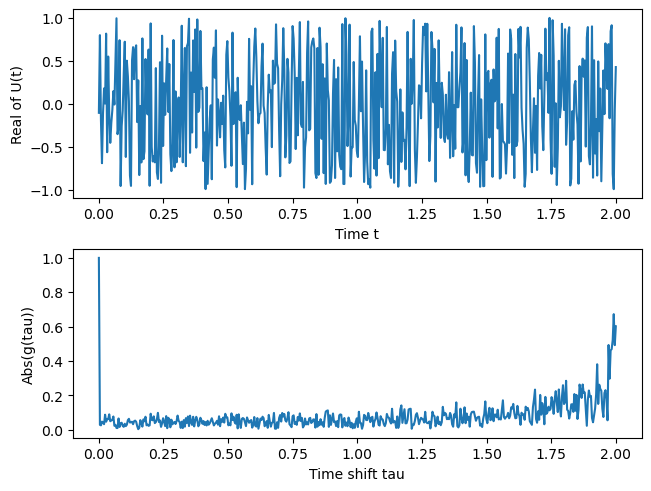

In [120]:
# make sure that the array respresents float numbers
absG = np.float32( np.absolute(g) )

# plot on two axes
fig, axs = plt.subplots(2, 1, layout="constrained")
axs[0].plot(t,np.real(U))
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('Real of U(t)')
axs[1].plot(t, absG )
axs[1].set_xlabel('Time shift tau')
axs[1].set_ylabel('Abs(g(tau))');

## Plot coherence function for partially random wave. ##

Define complex wave function with random values. Generate numbers between -1 and 1 for real and imag components.

In [123]:
# define random light
U = np.zeros(len(t),complex)  

# generate numbers between -1 and 1 for real and imag components
for n in range(len(U)):
    U[n] = (random.random()*2)-1 + 1j*(random.random()*2-1 )

Smooth data to make it less random

In [125]:
U1 = np.convolve(U, np.ones(50)/50, mode='valid')

# the smoothing shortens the array, match t array length
t = t[0:len(U1)]

Calculate autocorrelation function and normalize it to get the coherence function.

In [130]:
acorr = PH455.calcAutoCorrelation(U1)
g = acorr/acorr[0]

Plot the coherence function g.

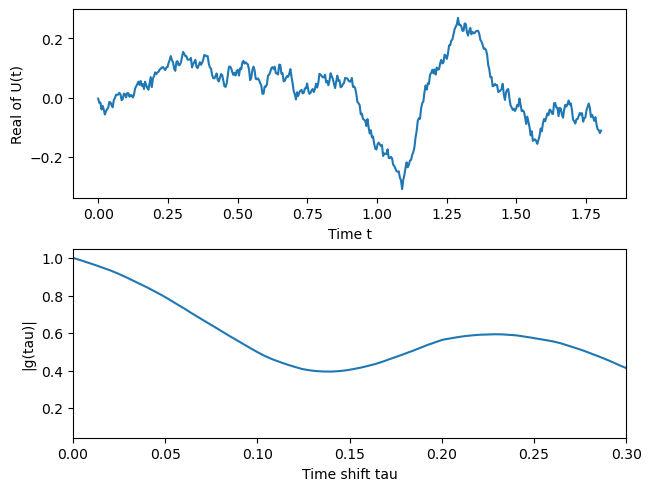

In [134]:
# make sure that the array respresents float numbers
absG = np.float32( np.absolute(g) )

# plot on two axes
fig, axs = plt.subplots(2, 1, layout="constrained")
axs[0].plot(t,np.real(U1))
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('Real of U(t)')

axs[1].plot(t, absG )
axs[1].set_xlabel('Time shift tau')
axs[1].set_ylabel('|g(tau)|')
axs[1].set_xlim([0, 0.3]);

## Plot coherence function for decay events. ##

Function to calculate U(t) for a single decay event that starts at time t0

In [138]:

def createDecayEvent(t, t0):
    tdrop = 1           # decay time for event
    T1 = 1              # period of light  
    U = (t>=t0) * np.exp(-1/2*(t-t0)/tdrop) * np.exp(-1j*2*np.pi/T1*(t-t0))
    return U


Create a couple of decay events at random times

In [141]:
t  = np.linspace(0,100,1000)

U = createDecayEvent(t,1)
for n in range(10):
    t0 = random.random() * t[-1]    # find time within time array
    U = U + createDecayEvent(t,t0)

Calculate autocorrelation function and normalize it to get the coherence function.

In [146]:
acorr = PH455.calcAutoCorrelation(U)
g = acorr/acorr[0]

Plot the coherence function g.

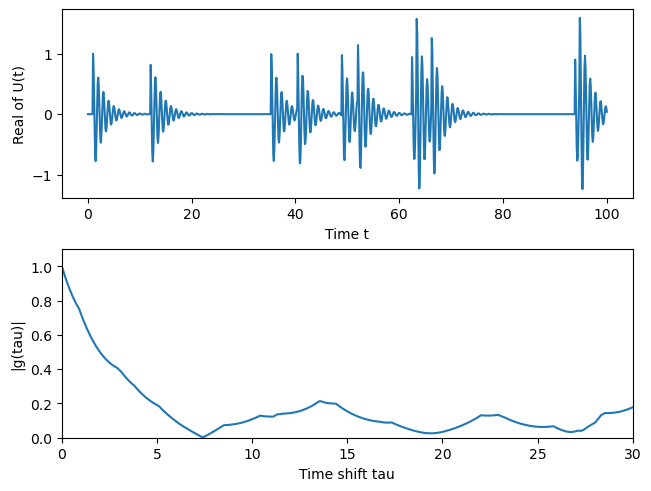

In [153]:
# make sure that the array respresents float numbers
absG = np.float32( np.absolute(g) )

# plot on two axes
fig, axs = plt.subplots(2, 1, layout="constrained")
axs[0].plot(t,np.real(U))
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('Real of U(t)')

axs[1].plot(t, absG )
axs[1].set_xlabel('Time shift tau')
axs[1].set_ylabel('|g(tau)|')
axs[1].set_xlim([0, 30])
axs[1].set_ylim([0, 1.1]);